In [1]:
import os
import random
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils #to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization,Dense,Flatten,Activation,Dropout

In [ ]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_SIZE =(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3
INIT_LR = 0.01
BATCH_SIZE =32
EPOCHS_NO = 50
FAST_RUN = True
lr_find = True


for i in os.listdir(no_fire):
    image_path =os.path.join(no_fire,i)
    img =cv2.imread(image_path)
    img=cv2.resize(img,IMAGE_SIZE)
    images.append(img)
    label.append([0,1]) #[0,1] for non fire class

In [7]:
# defining the classes of the images
classes= ['with_fire', 'without_fire']

# defining the path of the directories of both subfolders

fire = r'C:\Users\Prayuta\Downloads\Fire Detector Project\Fire_Detector\Fire'


# creating an empty list that will store all the images and labels
images = []
label = []

for i in os.listdir(fire):
    image_path =os.path.join(fire,i)
    img =cv2.imread(image_path)
    img=cv2.resize(img,IMAGE_SIZE)
    images.append(img)
    label.append([1,0]) #[1,0] for fire class
    

    
images = np.array(images, dtype='float64')/255 #here, we have converted the images list we got into an array and normalized each of its pixels.

label = np.array(label)
    
    

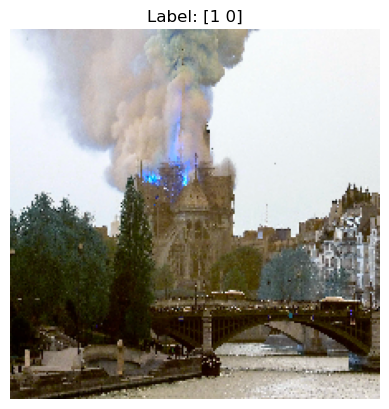

In [8]:
# Choose a random index
random_index = np.random.randint(len(images))

# Retrieve the random image and its corresponding label
random_image = images[random_index]
random_label = label[random_index]

# Display the image
plt.imshow(random_image)
plt.title('Label: {}'.format(random_label))
plt.axis('off')  # Hide axis
plt.show()

In [9]:
train_gen =ImageDataGenerator(rotation_range = 20,
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    width_shift_range = 0.3,
    fill_mode='nearest',
    brightness_range=[0.5, 1.5],
    height_shift_range = 0.3)

In [10]:
model = Sequential()

model.add(Conv2D(16,(3,3), activation = 'relu', padding = 'same', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(32,(3,3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
          
model.add(Conv2D(64,(3,3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
          
model.add(Conv2D(128,(3,3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
          
model.add(Conv2D(256,(3,3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
          
model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

model.summary()

C:\Users\intel\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 112, 112, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 112, 112, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 56, 56, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 14, 14, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 256)           │              

 Total params: 6,952,546 (26.52 MB)

 Trainable params: 6,950,018 (26.51 MB)

 Non-trainable params: 2,528 (9.88 KB)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(images, label, test_size=0.50, shuffle=True, random_state=42)

In [12]:
X_train.shape

(100, 224, 224, 3)

In [13]:
epochs = 50


detection = model.fit(
    train_gen.flow(X_train, y_train, batch_size=BATCH_SIZE),
    validation_data=(X_test, y_test),
    steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
    epochs=50,
#     callbacks=callbacks
)

model.save('fire_detection.h5')

Epoch 1/50


C:\Users\intel\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.5117 - loss: 1.0719 - val_accuracy: 0.0990 - val_loss: 0.7816
Epoch 2/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.5000 - loss: 1.2337

C:\Users\intel\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 284ms/step - accuracy: 0.5000 - loss: 0.8224 - val_accuracy: 0.9505 - val_loss: 0.5824
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5990 - loss: 0.9627 - val_accuracy: 1.0000 - val_loss: 0.5509
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 285ms/step - accuracy: 0.2500 - loss: 0.6842 - val_accuracy: 1.0000 - val_loss: 0.5364
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5716 - loss: 0.9379 - val_accuracy: 0.9802 - val_loss: 0.5222
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 289ms/step - accuracy: 0.7500 - loss: 0.4736 - val_accuracy: 0.8812 - val_loss: 0.5779
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 953ms/step - accuracy: 0.5732 - loss: 0.8528 - val_accuracy: 0.8812 - val_loss: 0.5704
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 284ms/step - accuracy: 0.6250 - loss: 0.5380 - val_accuracy: 0.8911 - val_loss: 0.5466
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5535 - loss: 0.8257 - val_accuracy: 0.6238 - val_loss: 0.6451
Epoch 10/50


KeyboardInterrupt: 

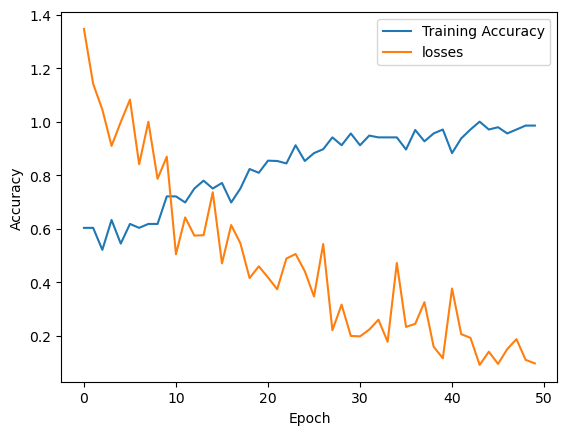

In [11]:
plt.plot(detection.history['accuracy'], label='Training Accuracy')
plt.plot(detection.history['loss'], label='losses')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
test_dir = r'C:\Users\Prayuta\Downloads\Fire Detector Project\Fire_Detector\output'

test_img=os.listdir(test_dir)
for i in range(10):
    ran_img =random.choice(test_img)
    img_path =os.path.join(test_dir,ran_img)
    img =cv2.imread(img_path)
    img=cv2.resize(img,(IMAGE_HEIGHT, IMAGE_WIDTH))
    
    img_input = img.reshape(1, IMAGE_HEIGHT, IMAGE_WIDTH, 3)  # Reshape for model input
    pred = model.predict(img_input)
    predicted_class = 'fire' if pred[0][0]> pred[0][1] else 'no_fire'  # Assuming 0.5 threshold
    
    text = f'{predicted_class}'
    cv2.putText(img, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Display the image with prediction
    cv2.imshow('Live predictions', img)
    cv2.waitKey(0)

# Close all windows
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
